In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import numpy as np

df = pd.read_csv("metadata.csv")

print(f"Sample created with shape: {df.shape}")
print(f"The first 10 rows of the sample data: {df.head(10)}")

C:\Users\user\AppData\Local\Temp\ipykernel_7928\549011854.py:19: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata_sample.csv")


Sample created with shape: (55000, 19)
The first 10 rows of the sample data:    cord_uid                                       sha source_x  \
0  s6b8qoky  7d4df9497dd21a911c8b7f9f9b114de528b3490b      PMC   
1  n7pttdwm                                       NaN  Medline   
2  szeq08lz                                       NaN      PMC   
3  0rh8g8kr                                       NaN      PMC   
4  ew3ftumt                                       NaN  Medline   
5  mjs5qf11                                       NaN      PMC   
6  mdo8n4en                                       NaN  Medline   
7  4nrsbmgl                                       NaN  Medline   
8  9838bdkr  2dec4dadeadba2564d59aa955d789938cd6217d0      PMC   
9  mbky3rsc                                       NaN      PMC   

                                               title  \
0              Auf Solidarität muss Solidität folgen   
1  Diaphragmatic hernia after percutaneous radiof...   
2                           

In [ ]:
# Load the sample data
df = pd.read_csv("metadata.csv", low_memory=False)

# Check shape and first few rows
print("Dataset shape:", df.shape)
print(df.head(10))

# Check data types
print("\nData Types:")
print(df.dtypes)

# Check missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Check empty strings per column
print("\nEmpty strings per column:")
print((df == "").sum())

# Generate basic statistics for numerical columns
print("\nNumerical summary:")
print(df.describe())


Dataset shape: (55000, 19)
   cord_uid                                       sha source_x  \
0  s6b8qoky  7d4df9497dd21a911c8b7f9f9b114de528b3490b      PMC   
1  n7pttdwm                                       NaN  Medline   
2  szeq08lz                                       NaN      PMC   
3  0rh8g8kr                                       NaN      PMC   
4  ew3ftumt                                       NaN  Medline   
5  mjs5qf11                                       NaN      PMC   
6  mdo8n4en                                       NaN  Medline   
7  4nrsbmgl                                       NaN  Medline   
8  9838bdkr  2dec4dadeadba2564d59aa955d789938cd6217d0      PMC   
9  mbky3rsc                                       NaN      PMC   

                                               title  \
0              Auf Solidarität muss Solidität folgen   
1  Diaphragmatic hernia after percutaneous radiof...   
2                                    Meet the Editor   
3  Exploring the Ecolo

In [4]:
# ------------------------------
# Handle missing data safely
# ------------------------------

# Separate numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numeric columns with mean
for col in num_cols:
    if df[col].isnull().sum() > 0:
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)
        print(f"Filled numeric column '{col}' with mean value: {mean_val:.2f}")
    else:
        print(f"No missing values in numeric column '{col}'")

# Fill categorical columns with mode
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"Filled categorical column '{col}' with mode value: {mode_val}")
    else:
        print(f"No missing values in categorical column '{col}'")

# ------------------------------
# Date processing
# ------------------------------
if 'publish_time' in df.columns:
    df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
    df['year'] = df['publish_time'].dt.year
    print("Converted 'publish_time' to datetime and extracted 'year'.")

# ------------------------------
# Create new features
# ------------------------------
if 'abstract' in df.columns:
    df['abstract_word_count'] = df['abstract'].apply(lambda x: len(str(x).split()))
    print("Created new column 'abstract_word_count'.")


Filled numeric column 'mag_id' with mean value: nan
Filled numeric column 'arxiv_id' with mean value: 2073.81
Filled numeric column 's2_id' with mean value: 217925215.76
No missing values in categorical column 'cord_uid'
Filled categorical column 'sha' with mode value: 0003793cf9e709bc2b9d0c8111186f78fb73fc04
No missing values in categorical column 'source_x'
Filled categorical column 'title' with mode value: Reply
Filled categorical column 'doi' with mode value: 10.1002/hep4.1737
Filled categorical column 'pmcid' with mode value: PMC1140948
Filled categorical column 'pubmed_id' with mode value: 35087663.0
No missing values in categorical column 'license'
Filled categorical column 'abstract' with mode value: An amendment to this paper has been published and can be accessed via a link at the top of the paper.
Filled categorical column 'publish_time' with mode value: 2021
Filled categorical column 'authors' with mode value: Anonymous,
Filled categorical column 'journal' with mode value: 

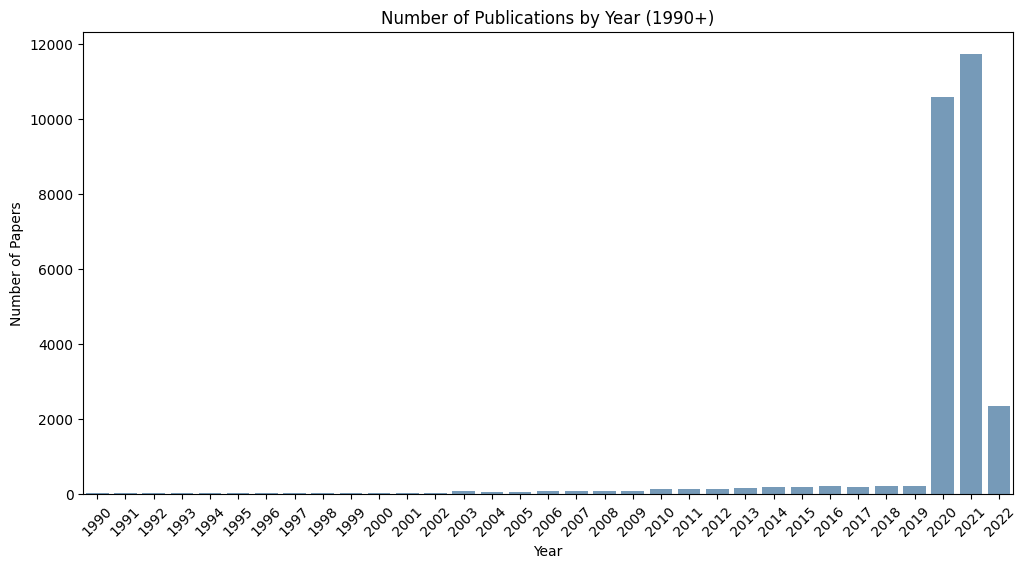

C:\Users\user\AppData\Local\Temp\ipykernel_3140\1032661175.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_journals.values, y=top_journals.index, palette='viridis')


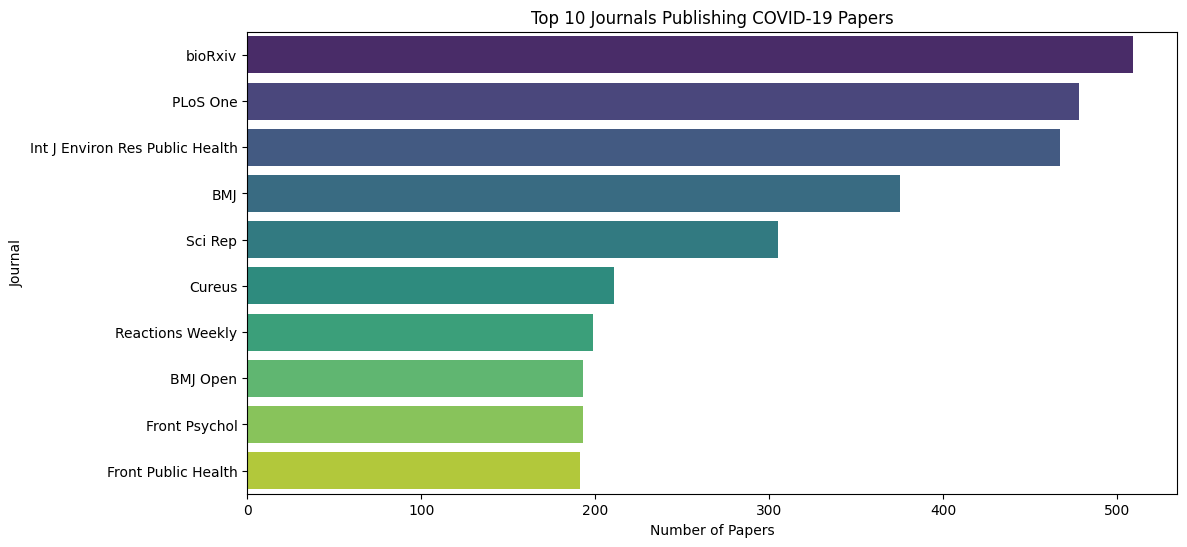

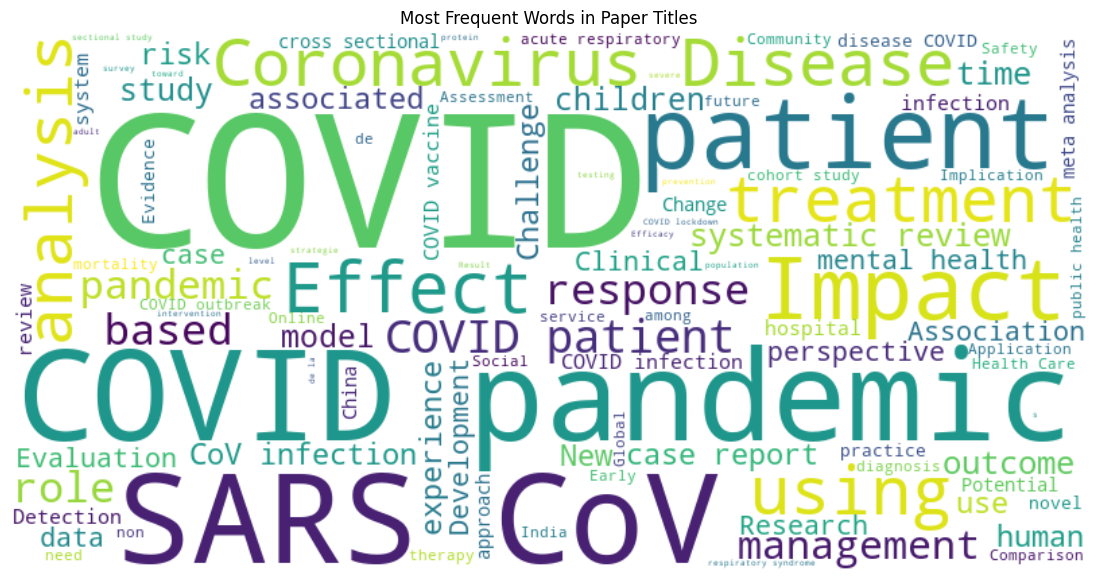

C:\Users\user\AppData\Local\Temp\ipykernel_3140\1032661175.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=source_counts.index, y=source_counts.values, palette='Set2')


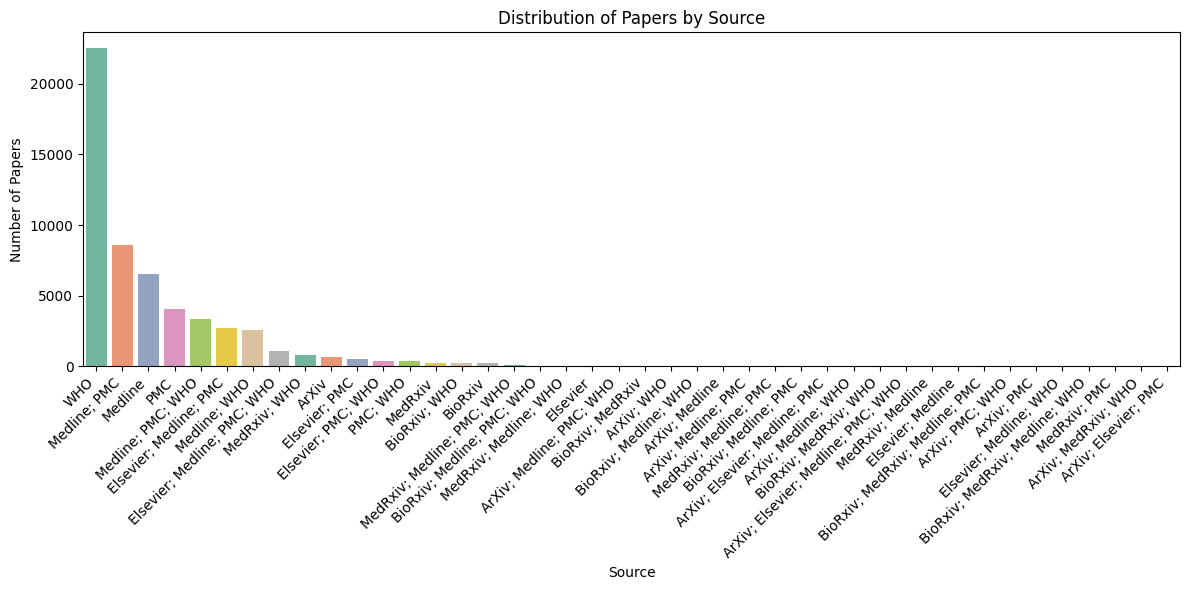

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# ==========================
# 1️⃣ Count papers by year
# ==========================
# Convert publish_time to numeric
df['publish_year'] = pd.to_numeric(df['publish_time'], errors='coerce')

# Drop rows with invalid years
df_year = df.dropna(subset=['publish_year']).copy()

# Keep only years >= 1990
df_year = df_year[df_year['publish_year'] >= 1990]

# Count papers per year
papers_per_year = df_year['publish_year'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=papers_per_year.index.astype(int),
            y=papers_per_year.values,
            color='steelblue', alpha=0.8)

plt.title("Number of Publications by Year (1990+)")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45)
plt.show()

# ==========================
# 2️⃣ Top 10 Journals
# ==========================
top_journals = df['journal'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_journals.values, y=top_journals.index, palette='viridis')
plt.title("Top 10 Journals Publishing COVID-19 Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# ==========================
# 3️⃣ Word Cloud of Paper Titles
# ==========================
all_titles = " ".join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(all_titles)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Paper Titles")
plt.show()

# ==========================
# 4️⃣ Distribution by Source
# ==========================
source_counts = df['source_x'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x=source_counts.index, y=source_counts.values, palette='Set2')
plt.title("Distribution of Papers by Source")
plt.xlabel("Source")
plt.ylabel("Number of Papers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Cross-validated Accuracy: 68.32%

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.71      0.65      0.68      4214
           1       0.67      0.73      0.70      4137

    accuracy                           0.69      8351
   macro avg       0.69      0.69      0.69      8351
weighted avg       0.69      0.69      0.69      8351


=== Confusion Matrix ===


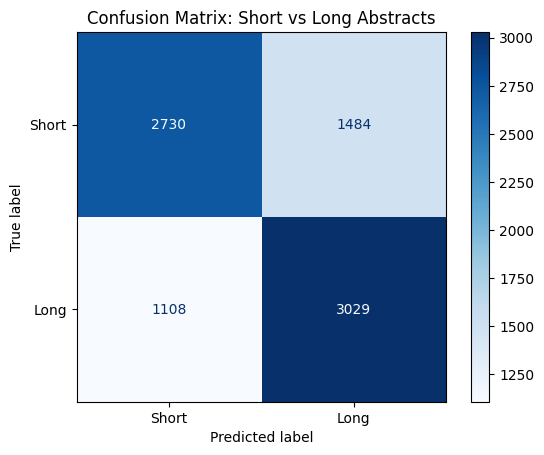

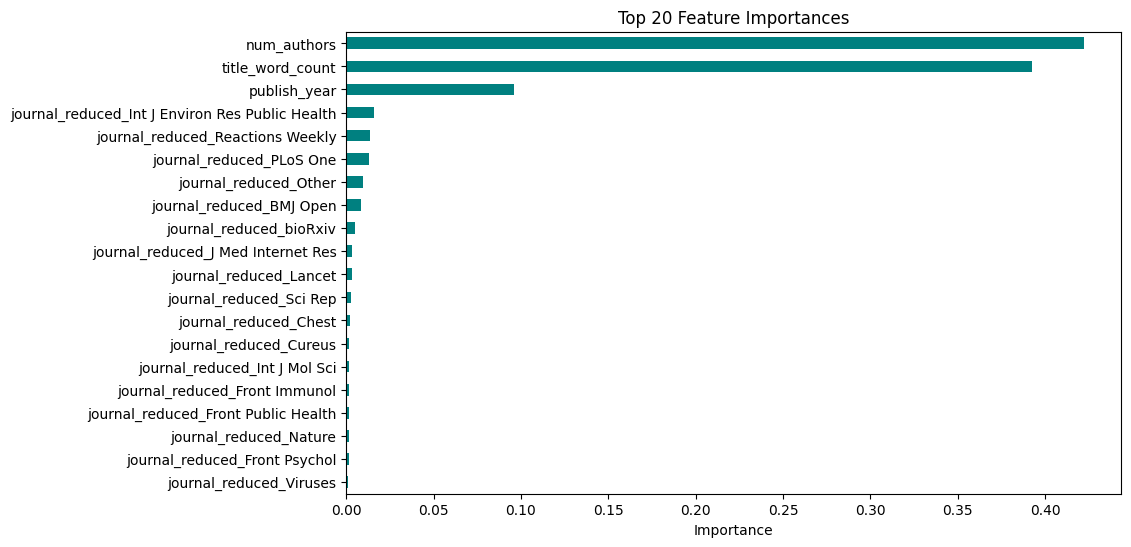

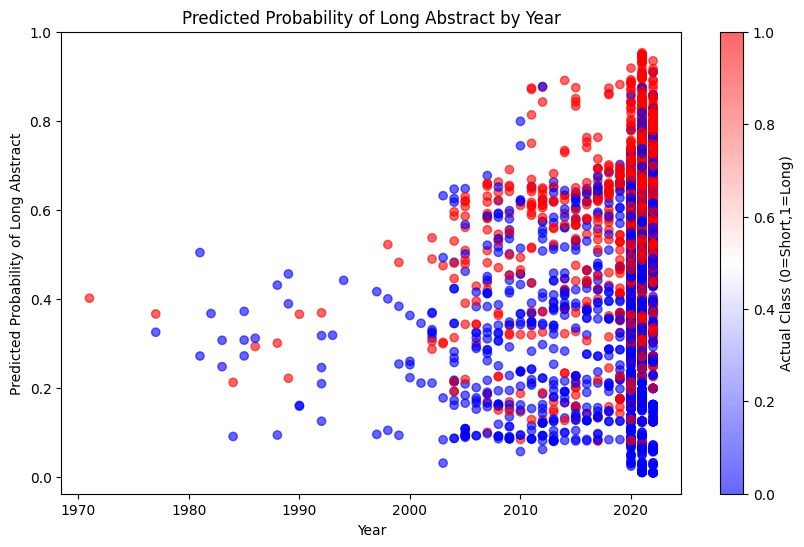

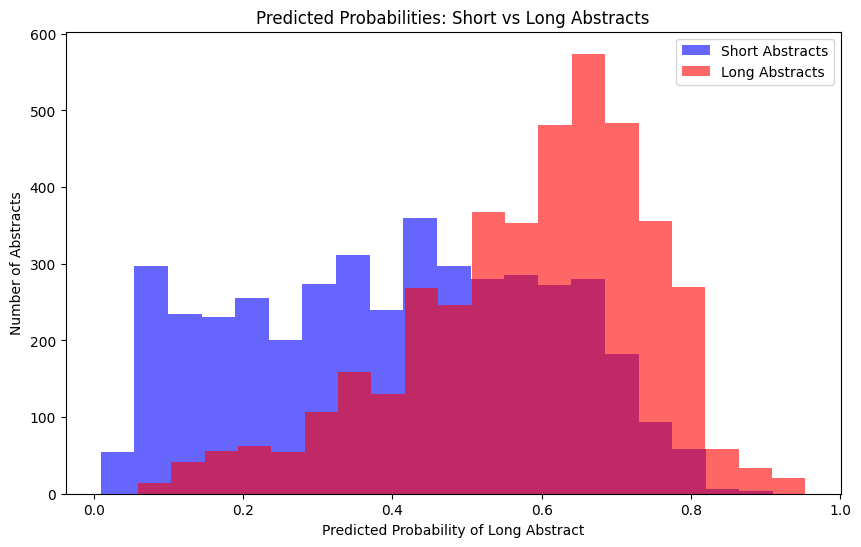

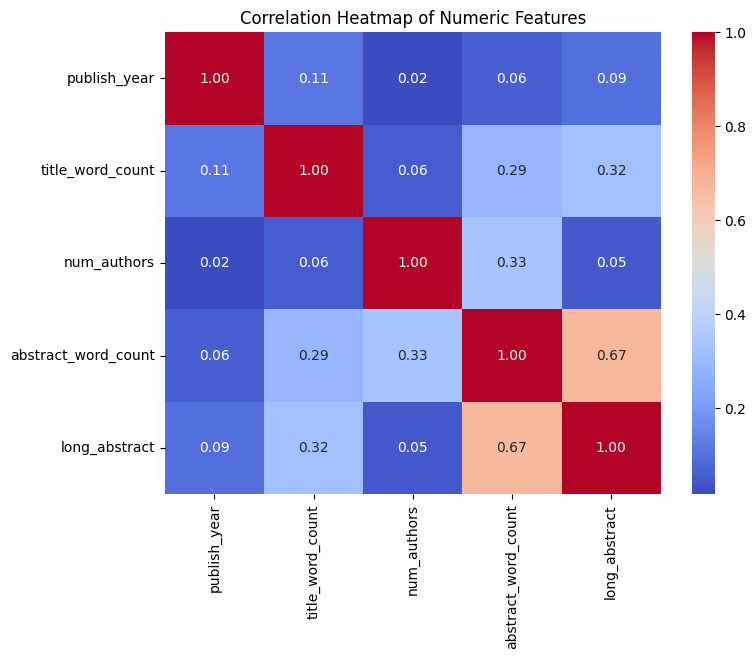

    abstract_word_count  long_abstract  publish_year  num_authors  \
0                   254              1        2022.0            2   
2                     0              0        2021.0            1   
3                   210              1        2021.0            1   
4                     0              0        2020.0            3   
5                   236              1        2021.0            5   
6                    56              0        2021.0            3   
8                   191              1        2020.0            1   
9                     0              0        2020.0            4   
10                  267              1        2022.0           12   
11                  292              1        2008.0            7   

    title_word_count  
0                  5  
2                  3  
3                 10  
4                  6  
5                 10  
6                 11  
8                  8  
9                  1  
10                11  
11        

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ==========================
# Load & Feature Engineering
# ==========================
df = pd.read_csv("metadata.csv", low_memory=False)

df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))
df['title_word_count'] = df['title'].fillna("").apply(lambda x: len(x.split()))
df['num_authors'] = df['authors'].fillna("").apply(lambda x: len(x.split(';')))
df['publish_year'] = pd.to_datetime(df['publish_time'], errors='coerce').dt.year

# Keep top 20 journals only
top_journals = df['journal'].value_counts().nlargest(20).index
df['journal_reduced'] = df['journal'].apply(lambda x: x if x in top_journals else 'Other')
df_encoded = pd.get_dummies(df, columns=['journal_reduced'], drop_first=True)

# Drop missing
df_encoded = df_encoded.dropna(subset=['abstract_word_count', 'publish_year'])

# Target: classify abstracts as short/long
median_wc = df_encoded['abstract_word_count'].median()
df_encoded['long_abstract'] = (df_encoded['abstract_word_count'] > median_wc).astype(int)

# Features & Target
feature_cols = ['publish_year', 'title_word_count', 'num_authors']
feature_cols += [col for col in df_encoded.columns if col.startswith('journal_reduced_')]

X = df_encoded[feature_cols]
y = df_encoded['long_abstract']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Random Forest
clf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Cross-validation accuracy
cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"\nCross-validated Accuracy: {cv_scores.mean():.2%}")

# ==========================
# Evaluation
# ==========================
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

print("\n=== Confusion Matrix ===")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Short', 'Long']).plot(cmap='Blues')
plt.title("Confusion Matrix: Short vs Long Abstracts")
plt.show()


# Feature importance plot
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10,6))
importances.plot(kind='barh', color='teal')
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.show()

# ==========================
# Plot: Predicted Probabilities vs Year
# ==========================
probs = clf.predict_proba(X_test)[:,1]  # probability of being 'Long'
plt.figure(figsize=(10,6))
plt.scatter(X_test['publish_year'], probs, c=y_test, cmap='bwr', alpha=0.6)
plt.colorbar(label='Actual Class (0=Short,1=Long)')
plt.xlabel("Year")
plt.ylabel("Predicted Probability of Long Abstract")
plt.title("Predicted Probability of Long Abstract by Year")
plt.show()

# ==========================
# Histogram of Predicted Probabilities
# ==========================

probs = clf.predict_proba(X_test)[:,1]  # probability of being 'Long'

plt.figure(figsize=(10,6))
plt.hist(probs[y_test==0], bins=20, alpha=0.6, label='Short Abstracts', color='blue')
plt.hist(probs[y_test==1], bins=20, alpha=0.6, label='Long Abstracts', color='red')
plt.xlabel("Predicted Probability of Long Abstract")
plt.ylabel("Number of Abstracts")
plt.title("Predicted Probabilities: Short vs Long Abstracts")
plt.legend()
plt.show()

# ==========================
# Correlation heatmap (numeric features only)
# ==========================
numeric_cols = ['publish_year', 'title_word_count', 'num_authors', 'abstract_word_count', 'long_abstract']
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

# Preview processed data
print(df_encoded[['abstract_word_count','long_abstract','publish_year','num_authors','title_word_count']].head(10))